# Data Science, Module 1
## Final Project Submission

* Student name: **William Dougherty**
* Student pace: **self paced**
* Scheduled project review date/time: **Friday April 16, 11:00 AM**
* Instructor name: **Jeff Herman**
* **[Blog Post](https://willcd.medium.com/data-science-for-the-silver-screen-2fd4a604de5d)**
* **[Video Walkthrough](https://youtu.be/N8jtt0MG_aE)**

## Overview

In this project, I will be exploring data on movies from various sources in order to answer the overall question:

"What type of films are currently doing the best at the box office?"

This is in the context of a hypothetical situation in which I am making recommendations to a large company that is looking to enter the film-making business (i.e. Microsoft) as to what parameters should guide their film development process.

## Contents

- I. Initial exploration
- II. 1st Question
- III. 2nd Question
- IV. 3rd Question
- V. 4th Question
- VI. Overall Conclusions

# I. Initial exploration

- Import, organize given data
- First basic data analysis

In [1]:
### Importing needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Importing data files

# Box Office Mojo
bom = pd.DataFrame(pd.read_csv('zippedData/bom.movie_gross.csv.gz'))

# IMDB
imbd_name_basics = pd.DataFrame(pd.read_csv('zippedData/imdb.name.basics.csv.gz'))
imdb_title_akas = pd.DataFrame(pd.read_csv('zippedData/imdb.title.akas.csv.gz'))
imdb_title_basics = pd.DataFrame(pd.read_csv('zippedData/imdb.title.basics.csv.gz'))
imdb_title_crew = pd.DataFrame(pd.read_csv('zippedData/imdb.title.crew.csv.gz'))
imdb_title_principals = pd.DataFrame(pd.read_csv('zippedData/imdb.title.principals.csv.gz'))
imdb_title_ratings = pd.DataFrame(pd.read_csv('zippedData/imdb.title.ratings.csv.gz'))

# Rotten Tomatoes
rt_info = pd.DataFrame(pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t'))
# Because of encoding issues, rt_reviews needed a different specified encoding to read/import
rt_reviews = pd.DataFrame(pd.read_csv('zippedData/rt.reviews.tsv.gz',\
                                      sep='\t', encoding = "ISO-8859-1"))

# The Movie DB
tmdb = pd.DataFrame(pd.read_csv('zippedData/tmdb.movies.csv.gz'))
# The-Numbers.com
tn_budgets = pd.DataFrame(pd.read_csv('zippedData/tn.movie_budgets.csv.gz'))

# Gathering all df's into a dictionary, for iteration purposes
all_df = {'bom':bom, 'imbd_name_basics': imbd_name_basics, 'imdb_title_akas': imdb_title_akas,\
          'imdb_title_basics': imdb_title_basics, 'imdb_title_crew': imdb_title_crew,\
          'imdb_title_principals': imdb_title_principals, 'imdb_title_ratings': imdb_title_ratings,
          'rt_info': rt_info, 'rt_reviews': rt_reviews, 'tmdb': tmdb, 'tn_budgets': tn_budgets}

In [2]:
# Display basic info, head()'s of all df's

for df in all_df.keys():
    print(f'DataFrame: {df}\n')
    display(all_df[df].info())
    display(all_df[df].describe())
    display(all_df[df].head())

DataFrame: bom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


DataFrame: imbd_name_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


None

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


DataFrame: imdb_title_akas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


None

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


DataFrame: imdb_title_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


DataFrame: imdb_title_crew

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


None

,tconst,directors,writers
count,146144,140417,110261
unique,146144,98525,91920
top,tt7559236,nm3266654,nm0000636
freq,1,62,80


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


DataFrame: imdb_title_principals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


None

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


DataFrame: imdb_title_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


DataFrame: rt_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


DataFrame: rt_reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


None

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


DataFrame: tmdb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


DataFrame: tn_budgets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# What movies made the most money, as a function of dollar made per dollar spent?
# First, turning the budget/gross entries into floats, in millions:

df1 = tn_budgets
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df1[col] = df1[col].replace('[\$\,\.]',"",regex=True).astype('float')
    df1[col] = round(df1[col] / 1000000, 3)
    
# And creating a new column, the return on production dollars 
# ((domestic, worldwide)_gross divided by production_budget)

df1['dom_return'] = round(df1['domestic_gross'] / df1['production_budget'], 1)
df1['ww_return'] = round(df1['worldwide_gross'] / df1['production_budget'], 1)

# And let's convert the release dates to a useable format:
df1['release_date'] = pd.to_datetime(df1['release_date'])

# Top 30 worldwide returns since the year 2000:
df1[df1['release_date'] >= '2000'].sort_values(by='ww_return', ascending=False).head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return
5492,93,2009-09-25,Paranormal Activity,0.450,107.919,194.183,239.8,431.5
5679,80,2015-07-10,The Gallows,0.100,22.764,41.656,227.6,416.6
5709,10,2004-05-07,Super Size Me,0.065,11.529,22.234,177.4,342.1
5781,82,2005-08-05,My Date With Drew,0.001,0.181,0.181,181.0,181.0
5656,57,2007-05-16,Once,0.150,9.446,23.324,63.0,155.5
5774,75,2004-10-08,Primer,0.007,0.425,0.842,60.7,120.3
5507,8,2004-06-11,Napoleon Dynamite,0.400,44.541,46.123,111.4,115.3
5430,31,2004-08-06,Open Water,0.500,30.501,55.519,61.0,111.0
5680,81,2006-09-29,Facing the Giants,0.100,10.178,10.243,101.8,102.4
5211,12,2012-01-06,The Devil Inside,1.000,53.263,101.759,53.3,101.8


In [4]:
# Now let's see the net revenue made (domestic and worldwide)
df1['dom_net'] = df1['domestic_gross'] - df1['production_budget']
df1['ww_net'] = df1['worldwide_gross'] - df1['production_budget']

# Here are the top 30 films, by worldwide net revenue (2000 and later):
df1[df1['release_date'] >= '2000'].sort_values(by='ww_net', ascending=False).head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return,dom_net,ww_net
0,1,2009-12-18,Avatar,425.0,760.508,2776.345,1.8,6.5,335.508,2351.345
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815,2048.134,2.3,6.8,378.815,1748.134
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662,2053.311,3.1,6.7,630.662,1747.311
33,34,2015-06-12,Jurassic World,215.0,652.271,1648.855,3.0,7.7,437.271,1433.855
66,67,2015-04-03,Furious 7,190.0,353.007,1518.723,1.9,8.0,163.007,1328.723
26,27,2012-05-04,The Avengers,225.0,623.280,1517.936,2.8,6.7,398.280,1292.936
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125.0,381.193,1341.693,3.0,10.7,256.193,1216.693
41,42,2018-02-16,Black Panther,200.0,700.060,1348.258,3.5,6.7,500.060,1148.258
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,417.720,1305.773,2.5,7.7,247.720,1135.773
155,56,2013-11-22,Frozen,150.0,400.738,1272.470,2.7,8.5,250.738,1122.470


# II. First Question

### "What budget range is most lucrative? And does this change when considering domestic vs. worldwide?"

Building on the exploration above, I'll find appropriate budget ranges and their relative revenues, for domestic and worldwide contexts.

In [25]:
# Looking at recent films (2000 and later), here are the .describe() stats for budgets:

df2 = df1[df1['release_date'] >= '2000'].copy()
df2.describe()['production_budget']

count    4387.000000
mean       34.508231
std        45.509048
min         0.001000
25%         5.000000
50%        18.000000
75%        43.000000
max       425.000000
Name: production_budget, dtype: float64

#### Thus, we can see that the budgets range from 1,000 to 425,000,000. The quartiles split nicely at around 5, 20, and 50 million.

In [6]:
# Defining 4 different categories: 0-5, 5-20, 20-50, 50+ (in millions)

def set_cat(row):
    if row.production_budget < 5:
        return '0-5'
    elif row.production_budget < 20:
        return '5-20'
    elif row.production_budget < 50:
        return '20-50'
    else:
        return '50+'

df2['budget_category'] = df2.apply(set_cat, axis = 1)
df2.head()

<ipython-input-6-8f467ccd7661>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['budget_category'] = df2.apply(set_cat, axis = 1)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return,dom_net,ww_net,budget_category
0,1,2009-12-18,Avatar,425.0,760.508,2776.345,1.8,6.5,335.508,2351.345,50+
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.064,1045.664,0.6,2.5,-169.536,635.064,50+
2,3,2019-06-07,Dark Phoenix,350.0,42.762,149.762,0.1,0.4,-307.238,-200.238,50+
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.006,1403.014,1.4,4.2,128.406,1072.414,50+
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181,1316.722,2.0,4.2,303.181,999.722,50+


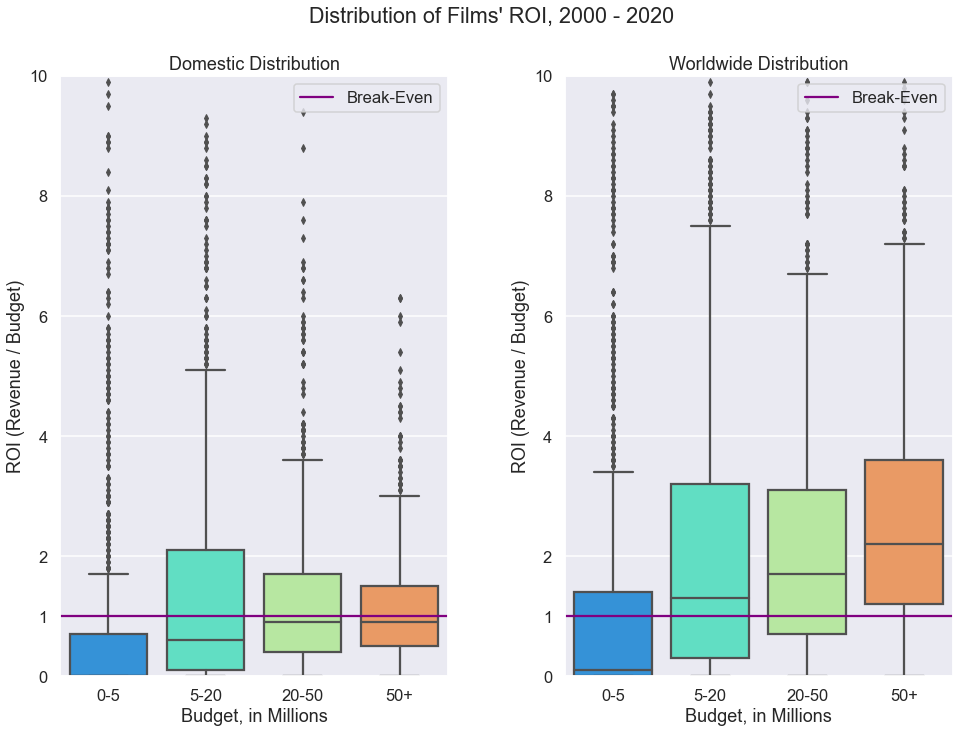

In [7]:
# Visualization: a boxplot of distributions of ROI (budget / revenue) for each category,
# and separate plots for Domestic and Worldwide

categories = ['0-5', '5-20', '20-50', '50+']

sns.set_context("talk")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
sns.boxplot(data=df2[df2['dom_return'] < 10],
            x='budget_category', y='dom_return',
            order=categories, palette='rainbow',
            ax=ax1)
ax1.set_xlabel('Budget, in Millions')
ax1.set_ylabel('ROI (Revenue / Budget)')
ax1.axhline(1, label='Break-Even', color='purple')
ax1.set_title('Domestic Distribution')
ax1.set_yticks([0, 1, 2, 4, 6, 8, 10])
ax1.legend(loc='upper right')
ax1.set_ylim(0, 10)

sns.boxplot(data=df2[df2['ww_return'] < 10],
            x='budget_category', y='ww_return',
            order=categories, palette='rainbow',
            ax=ax2)
ax2.set_xlabel('Budget, in Millions')
ax2.set_ylabel('ROI (Revenue / Budget)')
ax2.axhline(1, label='Break-Even', color='purple')
ax2.set_title('Worldwide Distribution')
ax2.set_yticks([0, 1, 2, 4, 6, 8, 10])
ax2.legend(loc='upper right')
ax2.set_ylim(0, 10)

plt.suptitle("Distribution of Films' ROI, 2000 - 2020", y=0.9)
plt.subplots_adjust(top=0.82, wspace=0.3)

#fig.savefig("Figure_1.png");

## Conclusions:

- Above, we see the proportional revenue returns of the four budget categories, in Domestic and Worldwide contexts.
- Domestically, the median returns of all categories are below 1.0 (breaking even) - 0-5 seems to perform particularly poorly.
- Worldwide, the higher 3 categories all have median returns above 1.0, with the IQR of the 50+ category sitting above it.

Thus, prospective films should be produced with worldwide distribution in mind, and have a budget of 5 million or higher. 

Indeed, if possible, budgets above 50 million seem to do better and better, and of course the higher the budget, the higher the raw returns: a 3.0 return on a movie costing 5 million would profit 10 million; a movie costing 150 million would profit 300 million!

# III. Second Question

### "Are there any trends in worldwide ROI over the last 20 years? Or worldwide net revenue?"

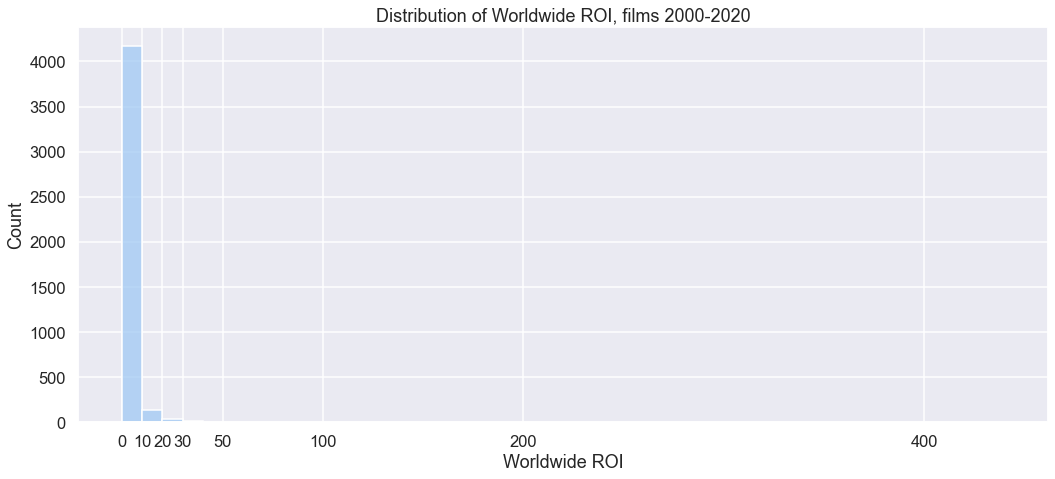

In [26]:
# Setting up the df2 dataframe with each entry having a year column

df2['year'] = df2['release_date'].dt.year

# A quick look at worldwide ROI distributions

sns.set_context("talk")

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

g = sns.histplot(data=df2, x='ww_return', binwidth=10)
g.set_xticks([0, 10, 20, 30, 50, 100, 200, 400])
g.set_xlabel('Worldwide ROI')
g.set_title('Distribution of Worldwide ROI, films 2000-2020')
plt.tight_layout()
#fig.savefig('Figure_2.png');

**In this very ugly histogram, we see that anything over 10 ROI is an extreme outlier.**

Presumably, any film making more than 10x its production budget is rare, and thus I'll exclude them from the analysis below.

Here is the zoomed-in view of the above histrogram, looking only at ROI's under 15:

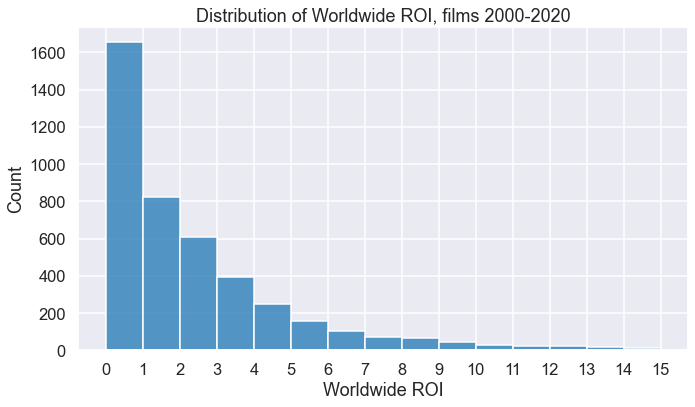

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.histplot(data=df2[df2['ww_return'] < 15], x='ww_return', binwidth=1)
g.set_xticks(list(range(0,16)))
g.set_xlabel('Worldwide ROI')
g.set_title('Distribution of Worldwide ROI, films 2000-2020')
plt.tight_layout()
#fig.savefig('Figure_2x.png');

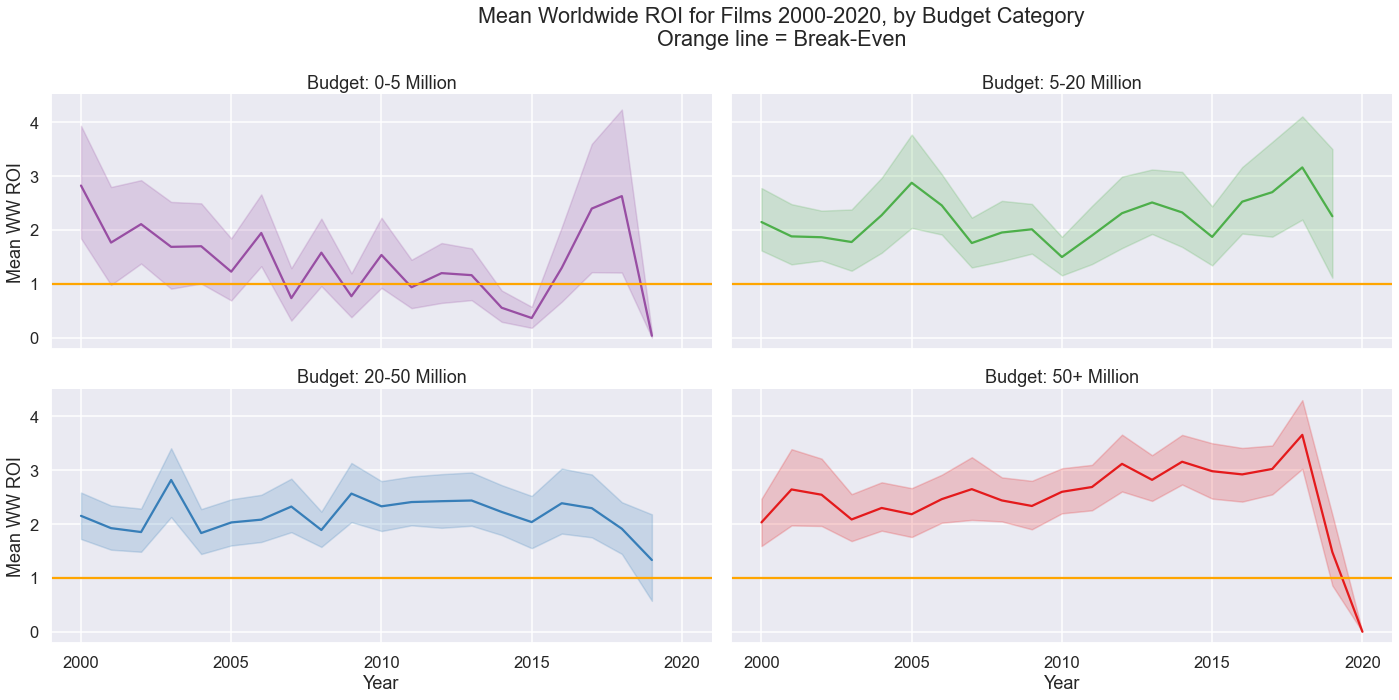

In [10]:
# Remove outliers
no_outliers = df2[df2['ww_return'] <= 10]

# Visualization: WW ROI of each category, over the period 2000-2020
sns.set_context("talk")

g = sns.relplot(data=no_outliers, x='year', y='ww_return', col_wrap=2,
                col='budget_category', hue='budget_category', col_order=['0-5', '5-20', '20-50', '50+'],
                palette='Set1', kind='line', aspect=2)
g.fig.suptitle('Mean Worldwide ROI for Films 2000-2020, by Budget Category\nOrange line = Break-Even')
g.set_axis_labels("Year", "Mean WW ROI")
g.set_titles(col_template="Budget: {col_name} Million")
g.set(xticks=[2000, 2005, 2010, 2015, 2020])
g.tight_layout()
g._legend.remove()
for ax in g.axes:
    ax.axhline(1, label='Break-Even', color='orange')
#g.fig.savefig("Figure_3.png");

#### Conclusions:
- This data largely lines up with the overall ROI graphs in Question 1
- The top 3 categories are the most successful, with each being slightly better than the lower ones
- What about net revenue for each category?

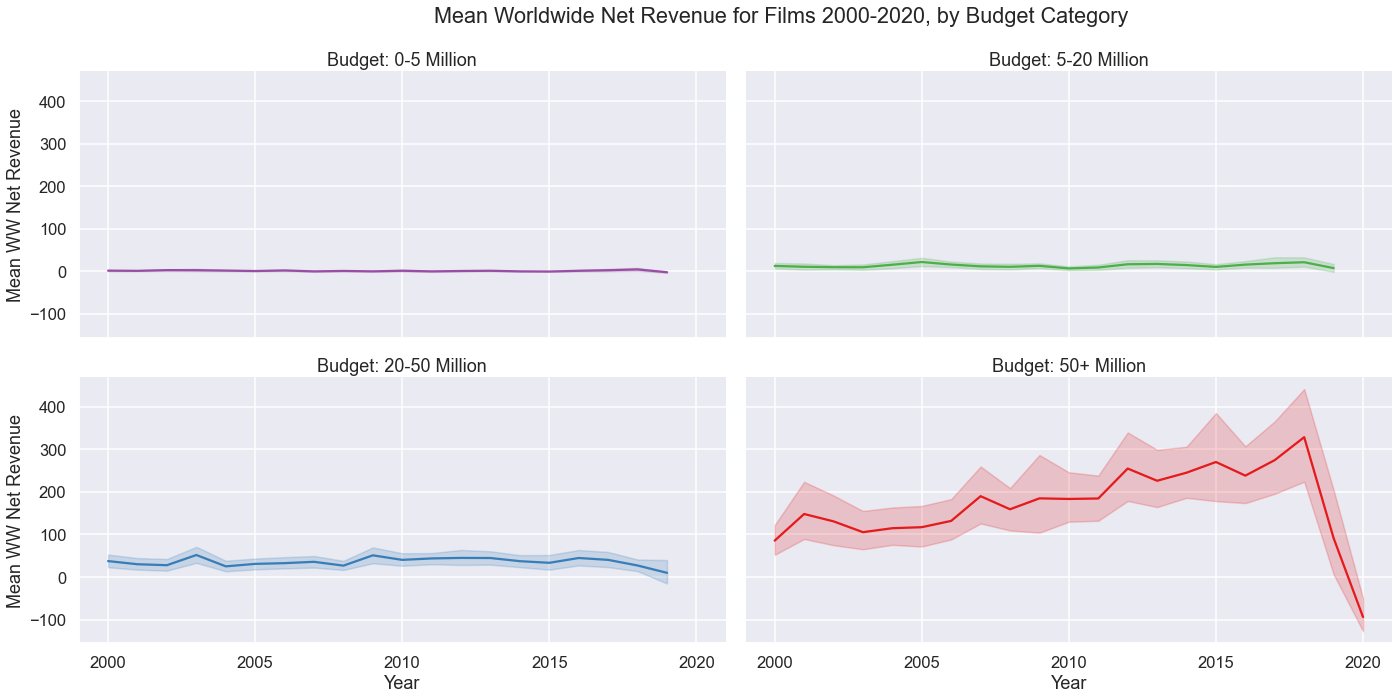

In [11]:
# Visualization: Net revenue of each category, over the period 2000-2020
sns.set_context("talk")

g = sns.relplot(data=no_outliers, x='year', y='ww_net', col_wrap=2,
                col='budget_category', hue='budget_category', col_order=['0-5', '5-20', '20-50', '50+'],
                palette='Set1', kind='line', aspect=2)
g.fig.suptitle('Mean Worldwide Net Revenue for Films 2000-2020, by Budget Category')
g.set_axis_labels("Year", "Mean WW Net Revenue")
g.set_titles(col_template="Budget: {col_name} Million")
g.set(xticks=[2000, 2005, 2010, 2015, 2020])
g.tight_layout()
g._legend.remove()
#g.fig.savefig("Figure_4.png");

## Conclusions:

- Looking at net revenue, it's much more clear that the 50+ million category is much more lucrative.
- The other categories' revenues are much lower, all well below 100 million. The 50+ category ranges from 100 to nearly 400 million, and is on a mostly upward trajectory (until 2020 of course).
- Thus, it seems that if raw dollar revenues are preferred over ROI, and if the budget is available, big-budget films are by far the most lucrative option.

# IV. Third Question

### "What film genres are the most profitable?"

- Now I will investigate the genres of films 2000-present, and how profitable they are.
- I will merge two dataframes to match up films with genre information with their corresponding budget/revenue data.
- Then, I will determine their worldwide ROI's, and order them from most to least profitable

In [12]:
# I will take the df1 (tn_budgets) from before, with its extra computed columns, 
# and use that to merge with the tmdb dataframe, so that genre can be analyzed.

# Preparing for merge, renaming 'movie' column in df1 to 'title' to match with tmdb data
df1.columns = ['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'dom_return', 'ww_return', 'dom_net', 'ww_net']

In [13]:
# Confirming data in each dataframe before merging

df1.sort_values(by='release_date')

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return,dom_net,ww_net
5677,78,1915-02-08,The Birth of a Nation,0.110,10.0,11.0,90.9,100.0,9.890,10.890
5523,24,1916-09-05,Intolerance,0.386,0.0,0.0,0.0,0.0,-0.386,-0.386
5614,15,1916-12-24,"20,000 Leagues Under the Sea",0.200,8.0,8.0,40.0,40.0,7.800,7.800
5683,84,1920-09-17,Over the Hill to the Poorhouse,0.100,3.0,3.0,30.0,30.0,2.900,2.900
5606,7,1925-11-19,The Big Parade,0.245,11.0,22.0,44.9,89.8,10.755,21.755
...,...,...,...,...,...,...,...,...,...,...
2329,30,2019-12-31,Reagan,25.000,0.0,0.0,0.0,0.0,-25.000,-25.000
3312,13,2019-12-31,Rogue City,13.000,0.0,0.0,0.0,0.0,-13.000,-13.000
535,36,2020-02-21,Call of the Wild,82.000,0.0,0.0,0.0,0.0,-82.000,-82.000
1205,6,2020-12-31,Hannibal the Conqueror,50.000,0.0,0.0,0.0,0.0,-50.000,-50.000


In [14]:
# Converting release_date in tmdb to datetime, for merging with df1
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])
tmdb.sort_values(by='release_date')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14335,14335,"[18, 10752]",143,en,All Quiet on the Western Front,9.583,1930-04-29,All Quiet on the Western Front,7.8,299
21758,21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23
3580,3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3
26345,26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3
11192,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243
...,...,...,...,...,...,...,...,...,...,...
24819,24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24003,24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24892,24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24265,24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4


In [15]:
# Merging tmdb and df1 on 'title' and 'release_date'

merged = tmdb.merge(df1, on=['title', 'release_date'], how='inner')
merged = merged[['genre_ids', 'title', 'release_date', 'production_budget',
                     'dom_return', 'ww_return', 'dom_net', 'ww_net']]

# Removing duplicates, and selecting only films made since 2000

merged = merged.drop_duplicates(subset='title', keep='first')
merged = merged[merged['release_date'] >= '2000']
display(merged.sort_values(by='release_date'))

,genre_ids,title,release_date,production_budget,dom_return,ww_return,dom_net,ww_net
391,"[80, 18, 878, 53]",Frequency,2000-04-28,31.00,1.5,2.2,13.984,37.080
198,"[18, 10402]",Almost Famous,2000-09-15,60.00,0.5,0.8,-27.478,-12.629
369,"[28, 18, 53, 10752]",Behind Enemy Lines,2001-11-30,40.00,1.5,1.5,18.856,18.856
10,"[28, 18, 9648, 53]",The Bourne Identity,2002-06-14,60.00,2.0,3.6,61.469,154.357
464,"[27, 12, 28]",Van Helsing,2004-05-07,170.00,0.7,1.8,-49.849,130.151
...,...,...,...,...,...,...,...,...
1349,"[53, 80, 18, 28]",Destroyer,2018-12-25,9.00,0.2,0.4,-7.467,-5.319
1147,"[35, 18]",The Upside,2019-01-11,37.50,2.9,3.2,70.735,81.525
1393,"[28, 16, 14, 12, 35, 878]",Dragon Ball Super: Broly,2019-01-16,8.50,3.6,14.4,21.877,114.248
1395,"[53, 18, 27]",Braid,2019-02-01,1.66,0.0,0.0,-1.660,-1.579


In [27]:
# Since tmdb used genre ids, I need to request the corresponding genre names (strings) from the TMDB api
# This is dummy code, to protect API key confidentiality

import requests
api_key = 'placeholder'
response = requests.get(f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US")

genre_ids = {}
for entry in response.json()['genres']:
    genre_ids[str(entry['id'])] = str(entry['name'])

# This is the returned genre_id info

genre_ids = {'28': 'Action',
 '12': 'Adventure',
 '16': 'Animation',
 '35': 'Comedy',
 '80': 'Crime',
 '99': 'Documentary',
 '18': 'Drama',
 '10751': 'Family',
 '14': 'Fantasy',
 '36': 'History',
 '27': 'Horror',
 '10402': 'Music',
 '9648': 'Mystery',
 '10749': 'Romance',
 '878': 'Science Fiction',
 '10770': 'TV Movie',
 '53': 'Thriller',
 '10752': 'War',
 '37': 'Western'}

KeyError: 'genres'

In [28]:
# Creating a dataframe for visualization: each genre, and the corresponding 
# median worldwide ROI for all films having that genre

genre_data = { 'genre':[], 'median_ww_return':[] }

for x in genre_ids:
    this_data = merged[merged['genre_ids'].str.contains(x)]
    genre_data['genre'].append(genre_ids[x])
    genre_data['median_ww_return'].append(this_data['ww_return'].median())
genres_df = pd.DataFrame.from_dict(genre_data)
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             0 non-null      float64
 1   median_ww_return  0 non-null      float64
dtypes: float64(2)
memory usage: 124.0 bytes


In [18]:
genres_df[genres_df['median_ww_return'].isna()]

,genre,median_ww_return
15,TV Movie,NaN


In [19]:
# Dropping "Tv Movie" genre, since its ROI is NaN
genres_df = genres_df.dropna().sort_values(by='median_ww_return', ascending=False)
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2 to 18
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             18 non-null     object 
 1   median_ww_return  18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


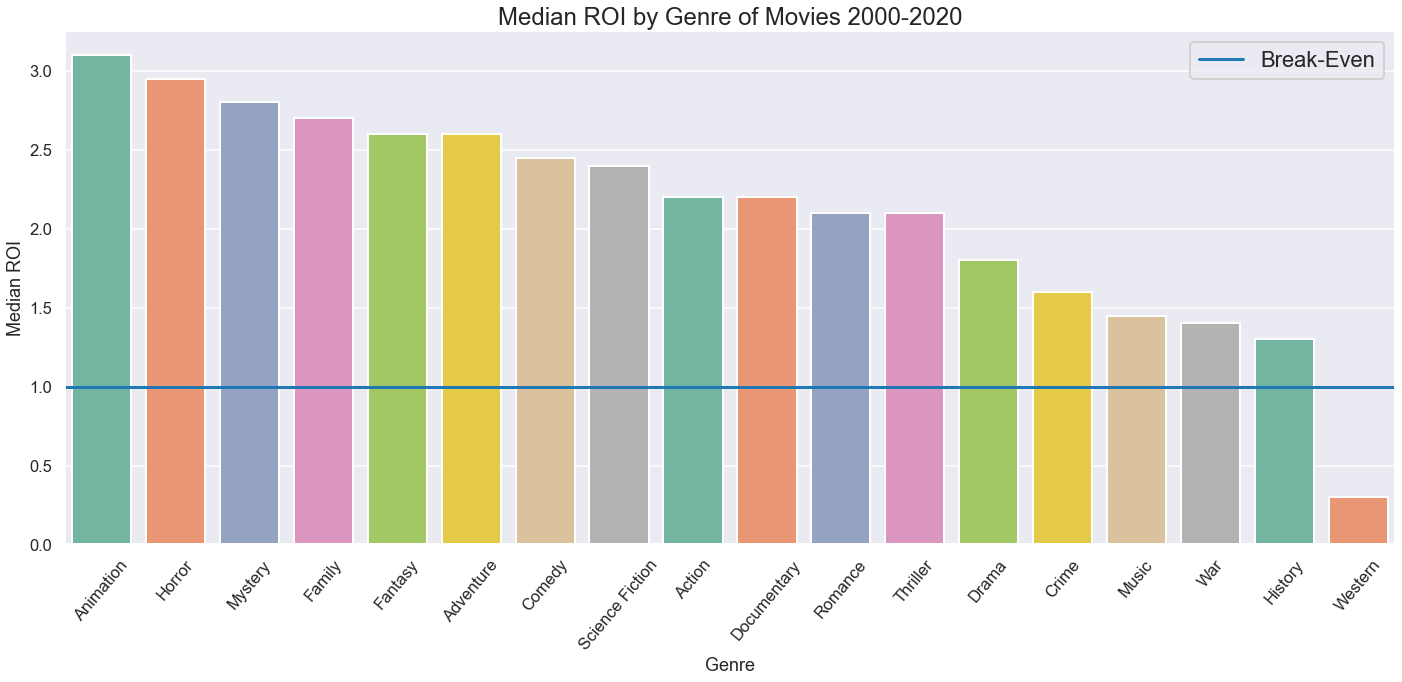

In [20]:
# This data would be best displayed as a barplot, and again with a horizontal "break-even" line at 1.0 ROI

fig, ax = plt.figure(figsize=(20, 10)), plt.axes()
sns.set_context('poster')

g = sns.barplot(x=genres_df['genre'], y=genres_df['median_ww_return'], palette='Set2')
g.set_xticklabels(labels=genres_df['genre'], rotation=50)
g.axhline(1, label='Break-Even')
g.legend()
g.set_title('Median ROI by Genre of Movies 2000-2020')
g.set_ylabel('Median ROI')
g.set_xlabel('Genre')
plt.tight_layout()
#fig.savefig('Figure_5.png');

## Conclusions:

- Almost all genres are largely profitable - 'Western' films seem to have not done well at all.
- There's a mostly smooth gradation from over 3.0 ROI to just over 1.0 ROI - and the lowest ('Western') being around 0.25 ROI.
- Since most genres are profitable, with only a few being under 1.5 ROI, and a majority over 2.0, I'd like to see if the very top genres are trending in any way over the last few decades, that might lead to more specificity for recommendations.

# V. Fourth Question

### "Are there any trends in genre ROI over recent years?"

- Leading from the previous results, I'll look at the trends of the top 6 genres (over 2.5 ROI)

In [21]:
# Again, setting a year column in the 'merged' dataframe from before

merged['year'] = merged['release_date'].dt.year
merged.sort_values(by='year')

,genre_ids,title,release_date,production_budget,dom_return,ww_return,dom_net,ww_net,year
198,"[18, 10402]",Almost Famous,2000-09-15,60.00,0.5,0.8,-27.478,-12.629,2000
391,"[80, 18, 878, 53]",Frequency,2000-04-28,31.00,1.5,2.2,13.984,37.080,2000
369,"[28, 18, 53, 10752]",Behind Enemy Lines,2001-11-30,40.00,1.5,1.5,18.856,18.856,2001
10,"[28, 18, 9648, 53]",The Bourne Identity,2002-06-14,60.00,2.0,3.6,61.469,154.357,2002
632,"[12, 35, 10751]",Lemony Snicket's A Series of Unfortunate Events,2004-12-17,100.00,1.2,2.1,18.627,112.956,2004
...,...,...,...,...,...,...,...,...,...
1399,"[28, 12, 16]",Bilal: A New Breed of Hero,2018-02-02,30.00,0.0,0.0,-29.509,-29.351,2018
1147,"[35, 18]",The Upside,2019-01-11,37.50,2.9,3.2,70.735,81.525,2019
1393,"[28, 16, 14, 12, 35, 878]",Dragon Ball Super: Broly,2019-01-16,8.50,3.6,14.4,21.877,114.248,2019
1395,"[53, 18, 27]",Braid,2019-02-01,1.66,0.0,0.0,-1.660,-1.579,2019


In [22]:
# Here, I'm setting up a dataframe with data for each year 2000-2019, and the median WW ROI for each genre per year.

genre_time = dict(Year=[], Animation=[], Horror=[], Mystery=[], Family=[], Fantasy=[], Adventure=[])

years = range(2000, 2020)

# A simple function to grab the genre id number from the genre_ids dict from earlier, so they can be matched easily below
def genre_id(val):
    for key, value in genre_ids.items():
         if val == value:
             return key

# Defining the top genres, and iterating through to assign the median WW ROI's for each genre per year

top_genres = ['Animation', 'Horror', 'Mystery', 'Family', 'Fantasy', 'Adventure']
for year in years:
    genre_time['Year'].append(str(year))
    for genre in top_genres:
        genre_time[genre].append(merged[(merged['genre_ids'].str.contains(genre_id(genre)))
                                       & (merged['year'] == year)]['ww_return'].median())
time_df = pd.DataFrame.from_dict(genre_time)

In [23]:
# Let's take a look!
time_df

,Year,Animation,Horror,Mystery,Family,Fantasy,Adventure
0,2000,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,NaN,NaN,3.60,NaN,NaN,NaN
3,2003,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,NaN,2.00,86.60,2.10,2.00,2.00
5,2005,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,NaN,NaN,3.40,NaN,NaN,NaN
8,2008,1.50,NaN,NaN,1.50,1.90,1.70
9,2009,NaN,NaN,NaN,NaN,6.50,6.50


**Since there is only solid data on all the top genres from 2010-2018, I'll focus on those years:**

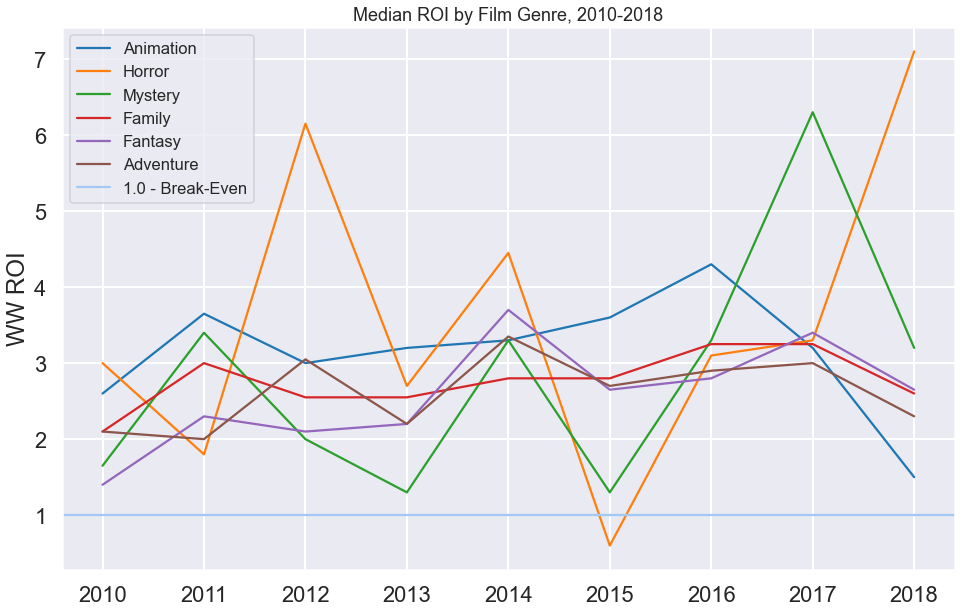

In [24]:
# Visualization: Median ROI per genre over 2010-2018. I'll iterate through the top genres again,
# and plot a separate line plot using that genre's data from the above dataframe.

fig, ax = plt.figure(figsize=(16, 10)), plt.axes()
sns.set_context("talk")

top_years = range(2010,2019)
sns.set_palette('pastel')
for genre in top_genres:
    sns.lineplot(data=time_df[(time_df['Year'] >= '2010') & (time_df['Year'] <= '2018')], 
                 x=top_years, y=genre, label=genre)

ax.set_title('Median ROI by Film Genre, 2010-2018')
ax.set_ylabel('WW ROI')
ax.axhline(1, label='1.0 - Break-Even')
ax.legend(top_genres + ['1.0 - Break-Even'])
#fig.savefig('Figure_6.png');

## Conclusions:

- The result here appears noisy and doesn't give very clear answers as to what has the most promising trajectory.
- Though Horror and Mystery have high peaks, they also have low valleys, so they seem to have high volatility.
- Animation, the top genre from before, is much more steady, as are the rest of the genres, and they are all roughly steady, with perhaps a slight upward trajectory over the time period.

# VI. Overall Conclusions

### Recommendations

- Just looking at the top films from the initial explorations qualitatively, there are two ways of looking at the success of the films.
- In terms of ROI (dollar of revenue per dollar of budget) since the year 2000, the top 30 films are largely cult classics/super-low-budget films (Paranormal Activity, Napoleon Dynamite), made for under $1,000,000, that are not easily reproduced.
- In terms of net worldwide revenue from the past 5 years, it's clear that all the top 30 films are some combination of franchise, superhero, and animated films. It's probably unhelpful to simply recommend "Make a wildly successful franchise of films, like Marvel or Star Wars!", so the questions following are looking for quantitative measures that can describe successful films.


- Based on the first question's results, it's very clear that worldwide revenue/profitability should be prioritized, as the majory of domestic ROI's are below 1.0 (break-even).
- In addition, a threshold of 5 million dollars is the point at which worldwide ROI is above the break-even point; and the more money invested, the more of a return is generated.


- In the second question, we saw that the highest category (50 million plus) is a clear winner in terms of net revenue over the period 2000-2020 - it's not as clear in terms of ROI. It's still highest, but it's in the ballpark of the other categories. The lowest category, 0-5 Million, is the clear loser in both measures.


- In terms of genre, questions 3 and 4 show that most genres have profitability potential.
- Westerns are the clear losers here, and History, War, and Music films aren't much better.
- When looking at the top genres, Animation, Horror, Mystery, etc are all quite profitable, but some (Horror, Mystery) can be more volatile over time.

